## Week 11 Assignment

## Lincoln Brown

## DSC550-T302

## Professor Werner

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Set Image Information
channels = 1 
height = 28
width = 28

## Step 1: Load the MNIST Data
Load the MNIST data set.


In [3]:
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

## Step 2: Display the first five images
Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

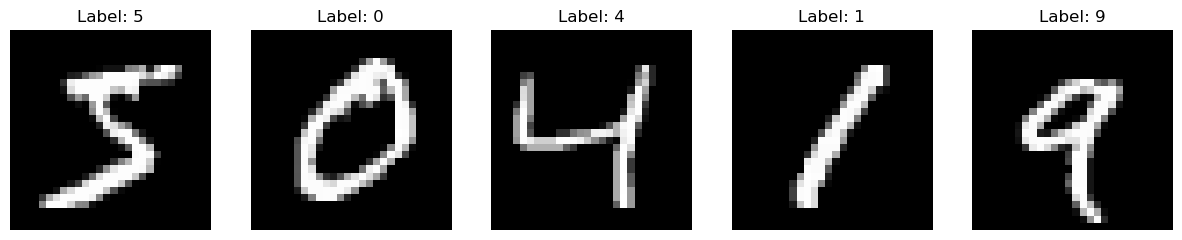

In [4]:
# Display the first five images
fig, axes = plt.subplots(1, 5, figsize=(15,3))
for i in range(5):
    axes[i].imshow(data_train[i], cmap='gray')
    label = target_train[i]
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

## Compare the images to their labels
The numbers all match their labels

## Step 3: Build and Train a Keras CNN
Build and train a Keras CNN classifier on the MNIST training set.


In [5]:
# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], height, width, channels)

In [6]:
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

In [7]:
# Rescale pixel intensity to between 0 and 1 
features_train = data_train / 255
features_test = data_test / 255

In [8]:
# One-hot encode target
target_train = to_categorical(target_train)
target_test = to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [9]:
# Start neural network
network = models.Sequential()

In [10]:
# Add convolutional layer with 64 filters, a 5x5 window, and a ReLU activation function
network.add(layers.Conv2D(64, (5,5), activation='relu', input_shape=(height, width, channels)))

In [11]:
# Add max pooling layer with a 2x2 window
network.add(layers.MaxPooling2D(pool_size=(2,2)))

In [12]:
# Add dropout layer
network.add(layers.Dropout(0.5))

In [13]:
# Add layer to flatten input
network.add(layers.Flatten())

In [14]:
# Add fully connected layer of 128 units with a ReLU actviation function
network.add(layers.Dense(128, activation='relu'))

In [15]:
# Add dropout layer
network.add(layers.Dropout(0.5))

In [16]:
# Add fully connected layer with a softmax activation function
network.add(layers.Dense(number_of_classes, activation='softmax'))

In [17]:
# Compile neural network
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [18]:
# Train neural network
network.fit(features_train, # Features
            target_train, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation


## Report the Test Accuracy of Your Model

Report the test accuracy of your model.


In [19]:
# Evalute the model and print the model accuracy
test_loss, test_accuracy = network.evaluate(features_test, target_test)
print(f"The Test Accuracy of the Keras CNN model is: {test_accuracy:.2%}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9724
The Test Accuracy of the Keras CNN model is: 97.24%


## Display a Confusion Matrix on the Test Set

Display a confusion matrix on the test set classifications.


In [20]:
# Make predictions on the test set
test_pred = network.predict(features_test)
conf_matrix = confusion_matrix(np.argmax(target_test, axis=1), np.argmax(test_pred, axis=1))

313/313 [==============================] - 1s 2ms/step


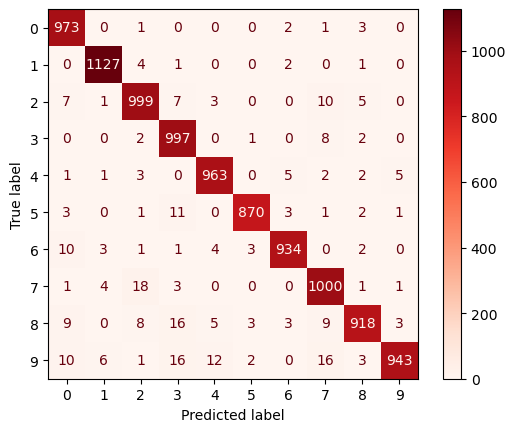

In [21]:
# Display the confusion matrix
labels = [str(i) for i in range(number_of_classes)]
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=labels)
disp.plot(cmap='Reds', values_format='d')
plt.show()

## Step 6: Summary

This was a really good introduction into the world of neural networks, albeit not without its difficulties. 

The goal of this Keras Convolutional Neural Network (CNN) was a multiclassification problem using the MNIST data set to correctly identify handwritten numbers. 


We start off with importing the MNIST dataset. From here, we need to reshape the data for loading into the CNN. Additionally, the pixel intensity needed to be rescaled between 0 and 1 to be handled by the network. We also one hot encoded the features. For the encoding, the features were converted into 10 classes representing the digits 0-9. 

We then created a Sequential model, which stacks linear layers on top of one another. 

The first layer we added was a convolutional input layer, with 64 filters, a 5x5 window, and a ReLU activiation function. I got the values for these hyperparameters from Machine Learning with Python Cookbook 1st Edition. 

Next, we added a max pooling layer that is used to summarize the nearby pixels. 

After that, we add a dropout layer which helps reduce the possibility of overfitting. 

Following the dropout layer, we add a flatten later that is used to convert the convolutionary inputs into a format that can be handled by a fully connected layer. 

Finally, we add the fully connected layers and an output layer to do the classification. We use a softmax activation function in the output layer because we are dealing with a multiclassification problem. 

The model achieved an accuracy score of 97.24%, which seems very good to me. Looking at the confusion matrix was also interesting, because you could see which numbers were incorrectly identified and which number the network thought they were. The number 7 was misclassified as the number 2, 18 times. This was the highest error for an individual label we saw. 

I really enjoyed working on this assignment and it went much easier after I pulled out my first edition copy of the book and worked through the example that the assignment was based on. 